In [1]:
#Imports 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from datetime import date
from datetime import timedelta

In [3]:
Data = pd.read_csv('historico_rese_room_original2.csv', header =1)

In [4]:
Data.head()

,ID,Número,Nombre,Tarifa,Entrada,Salida,Noches,Cant_Hab,Pax,TotalNoches,F_Reserva,Anulación,Estado,Importe,Moneda
0,1.0,RE 64,MARLIS JANSEN,2 COSTA RIC,13/2/2010,20/2/2010,7,1,4,7,1/12/2009,NaN,Check-In,"5,734.00",USD
1,2.0,RE 482,bmbnm,2 COSTA RIC,12/8/2010,13/8/2010,1,1,2,1,12/8/2010,NaN,Solicitada,397,USD
2,3.0,RE 693,Pete Wilson,2 COSTA RIC,27/12/2010,29/12/2010,2,1,4,2,15/12/2010,NaN,Check-In,"1,299.00",USD
3,4.0,RE 884,Ted W Sartin,2 COSTA RIC,26/2/2011,28/2/2011,2,1,2,2,17/2/2011,NaN,Check-In,621,USD
4,5.0,RE 1067,Allen & Scarlotte Kilgore,2 COSTA RIC,11/5/2011,14/5/2011,3,1,2,3,30/4/2011,NaN,Check-In,847,USD


In [38]:
Data.describe()

,ID,Cant_Hab,Pax,TotalNoches,Anulación,Importe,Antelacion
count,9535.000000,9535.000000,9535.000000,9535.000000,0.0,9535.000000,9535.000000
mean,4769.376193,1.053697,3.885160,3.781227,NaN,1704.101206,59.401049
std,2753.295661,0.469827,2.443514,2.577957,NaN,1860.135954,133.831654
min,1.000000,1.000000,1.000000,0.000000,NaN,0.000000,-333.000000
25%,2385.500000,1.000000,2.000000,2.000000,NaN,524.000000,0.000000
50%,4770.000000,1.000000,4.000000,3.000000,NaN,1265.000000,31.000000
75%,7153.500000,1.000000,5.000000,5.000000,NaN,2305.000000,122.000000
max,9537.000000,24.000000,62.000000,45.000000,NaN,26644.000000,1095.000000


In [26]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 15 columns):
ID             9537 non-null float64
Número         9537 non-null object
Nombre         9537 non-null object
Tarifa         9537 non-null object
Entrada        9537 non-null object
Salida         9537 non-null object
Noches         9538 non-null object
Cant_Hab       9538 non-null int64
Pax            9538 non-null int64
TotalNoches    9538 non-null int64
F_Reserva      9537 non-null object
Anulación      0 non-null float64
Estado         9537 non-null object
Importe        9537 non-null object
Moneda         9537 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 745.2+ KB


In [4]:
Data['Entrada'] =  pd.to_datetime(Data['Entrada'])

In [5]:
Data['F_Reserva'] =  pd.to_datetime(Data['F_Reserva'])

In [6]:
Data['Salida'] =  pd.to_datetime(Data['Salida'])

In [7]:
Data['Antelacion'] = (Data['Entrada'] - Data['F_Reserva'])

In [8]:
Data.Importe = Data.Importe.str.replace(',','')

In [9]:
Data['Importe'] = pd.to_numeric(Data['Importe'],errors='coerce')

In [10]:
Data = Data[Data.TotalNoches <51]

In [11]:
Data['Antelacion'] = Data['Antelacion'] / (np.timedelta64(1,'D'))

In [12]:
Data['Antelacion'] = Data['Antelacion'].astype(np.int64)

In [13]:
Data = Data[Data.Antelacion >0]

In [14]:
Data.head()

,ID,Número,Nombre,Tarifa,Entrada,Salida,Noches,Cant_Hab,Pax,TotalNoches,F_Reserva,Anulación,Estado,Importe,Moneda,Antelacion
0,1.0,RE 64,MARLIS JANSEN,2 COSTA RIC,2010-02-13,2010-02-20,7,1,4,7,2009-01-12,NaN,Check-In,5734.0,USD,397
2,3.0,RE 693,Pete Wilson,2 COSTA RIC,2010-12-27,2010-12-29,2,1,4,2,2010-12-15,NaN,Check-In,1299.0,USD,12
3,4.0,RE 884,Ted W Sartin,2 COSTA RIC,2011-02-26,2011-02-28,2,1,2,2,2011-02-17,NaN,Check-In,621.0,USD,9
4,5.0,RE 1067,Allen & Scarlotte Kilgore,2 COSTA RIC,2011-11-05,2011-05-14,3,1,2,3,2011-04-30,NaN,Check-In,847.0,USD,189
5,6.0,RE 883,Dakajos Family,ADOBECAR,2011-03-30,2011-03-04,4,1,4,4,2011-02-17,NaN,Check-In,2260.0,USD,41


In [19]:
Data.to_csv(r'C:\Users\Esteban Vargas\Desktop\QuickSIght\ losaltostest.csv')

In [52]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9535 entries, 0 to 9536
Data columns (total 16 columns):
ID             9535 non-null float64
Número         9535 non-null object
Nombre         9535 non-null object
Tarifa         9535 non-null object
Entrada        9535 non-null datetime64[ns]
Salida         9535 non-null datetime64[ns]
Noches         9535 non-null object
Cant_Hab       9535 non-null int64
Pax            9535 non-null int64
TotalNoches    9535 non-null int64
F_Reserva      9535 non-null datetime64[ns]
Anulación      0 non-null float64
Estado         9535 non-null object
Importe        9535 non-null float64
Moneda         9535 non-null object
Antelacion     9535 non-null int64
dtypes: datetime64[ns](3), float64(3), int64(4), object(6)
memory usage: 1.0+ MB


c:\users\esteban vargas\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\esteban vargas\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


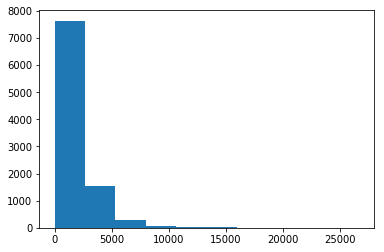

In [41]:
plt.hist(Data['Importe'])
plt.show()

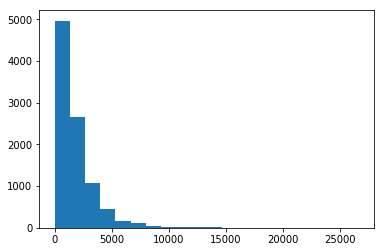

In [15]:
plt.hist(Data['Importe'], bins=20)
plt.show()

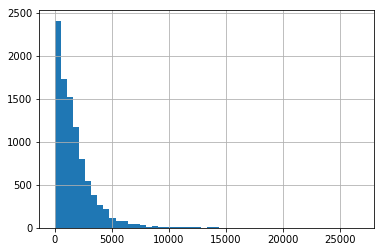

In [16]:
Data['Importe'].hist(bins=50)

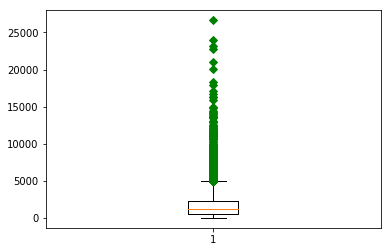

In [23]:
A = Data['Importe']
plt.boxplot(A,0,'gD')
plt.show()

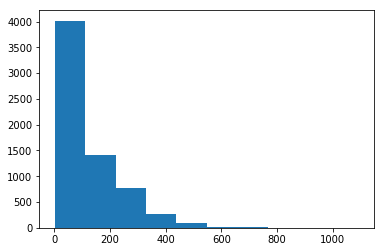

In [15]:
plt.hist(Data['Antelacion'])
plt.show()

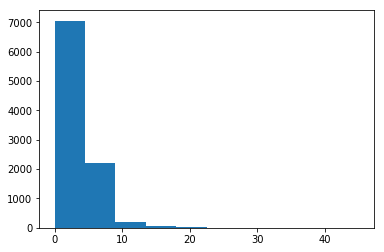

In [20]:
plt.hist(Data['TotalNoches'])
plt.show()

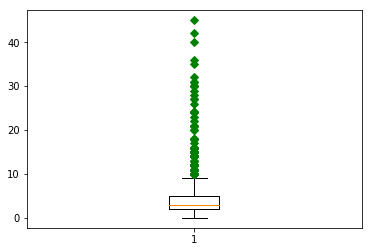

In [19]:
A = Data['TotalNoches']
plt.boxplot(A,0,'gD')
plt.show()

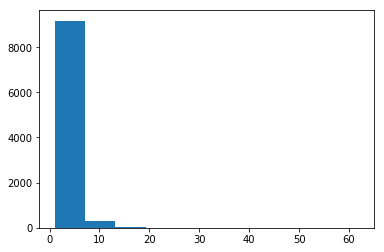

In [17]:
plt.hist(Data['Pax'])
plt.show()

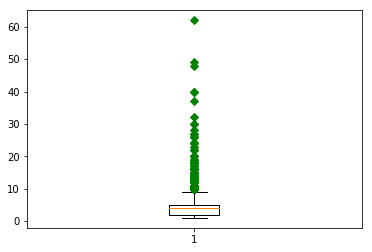

In [28]:
A = Data['Pax']
plt.boxplot(A,0,'gD')
plt.show()

Text(0, 0.5, 'TotalNoches')

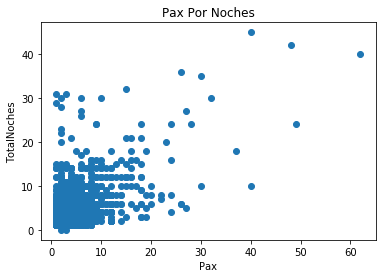

In [27]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(Data['Pax'], Data['TotalNoches'])
# set a title and labels
ax.set_title('Pax Por Noches')
ax.set_xlabel('Pax')
ax.set_ylabel('TotalNoches')

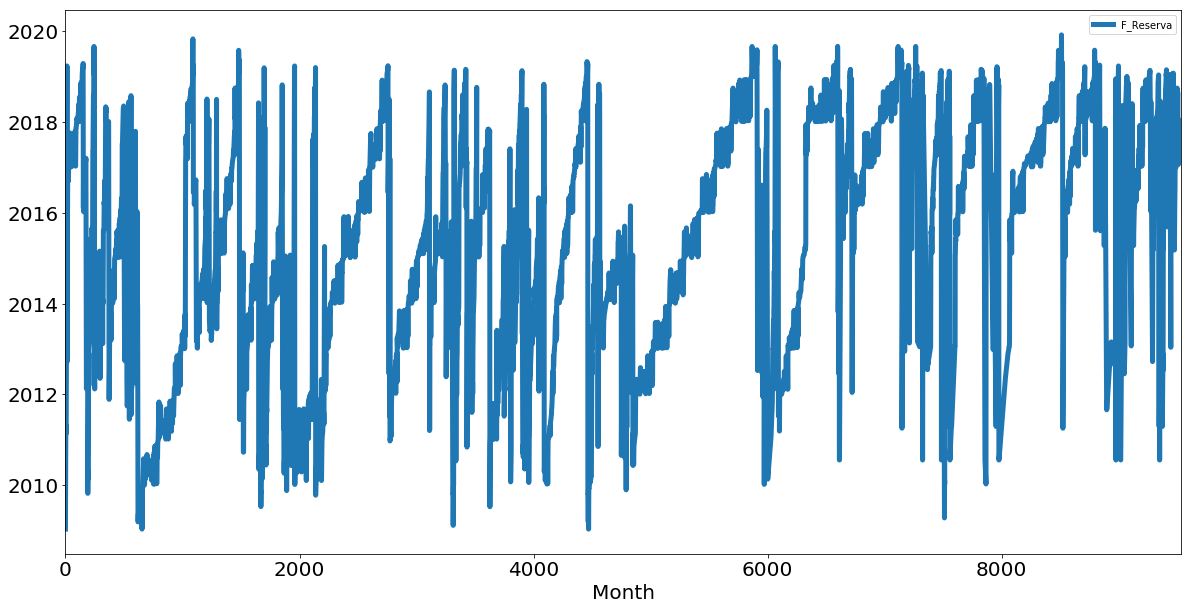

In [16]:
Data[['F_Reserva']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20);

In [25]:
Data['F_Reserva'].value_counts()

2018-01-05    31
2010-07-22    21
2017-01-16    19
2013-04-12    19
2017-05-12    15
2018-02-01    14
2017-02-27    14
2017-01-11    14
2014-01-13    14
2018-01-16    14
2018-01-25    13
2017-01-13    13
2016-11-01    13
2018-04-30    13
2018-05-01    13
2017-03-13    13
2015-08-01    13
2013-02-19    12
2018-01-24    12
2015-01-19    12
2017-09-18    12
2018-07-11    12
2013-05-07    12
2018-01-30    12
2009-06-11    12
2019-09-01    12
2012-02-05    12
2018-01-15    11
2018-08-10    11
2013-03-15    11
              ..
2012-11-23     1
2012-09-08     1
2015-07-09     1
2014-06-19     1
2012-11-18     1
2012-03-10     1
2010-08-09     1
2014-12-20     1
2010-01-06     1
2013-02-09     1
2019-03-30     1
2013-06-24     1
2010-11-18     1
2016-10-09     1
2012-06-24     1
2015-01-10     1
2011-06-18     1
2011-07-28     1
2014-12-19     1
2015-08-09     1
2015-09-28     1
2011-08-15     1
2016-06-11     1
2018-06-08     1
2019-03-29     1
2012-06-17     1
2009-11-14     1
2014-03-14    

In [26]:
Data.groupby('F_Reserva')['Cant_Hab'].count()

F_Reserva
2009-01-11     2
2009-01-12     3
2009-02-11     1
2009-02-12     1
2009-03-11     3
2009-04-12     1
2009-05-11     4
2009-05-12     1
2009-06-11    12
2009-07-11     2
2009-07-12     2
2009-08-12     1
2009-09-11     1
2009-10-12     2
2009-10-27     8
2009-11-12     2
2009-11-13     1
2009-11-14     1
2009-11-15     2
2009-11-16     1
2009-11-18     1
2009-11-20     1
2009-11-21     1
2009-11-23     3
2009-11-24     1
2009-11-26     7
2009-11-27     1
2009-11-30     1
2009-12-12     2
2009-12-16     1
              ..
2019-04-30     1
2019-05-01     4
2019-05-02     7
2019-05-03     3
2019-05-13     2
2019-06-02     2
2019-06-03     4
2019-06-04     2
2019-07-01     3
2019-07-02     2
2019-07-03     1
2019-08-01     6
2019-08-02     2
2019-08-03     2
2019-08-04     1
2019-08-05     1
2019-09-01    12
2019-09-02     8
2019-09-03     2
2019-10-01     8
2019-10-03     1
2019-10-04     1
2019-11-01     3
2019-11-02     2
2019-11-03     5
2019-11-04     1
2019-12-01     5
2019

In [14]:
Data['Year_FR'] = (pd.to_datetime(Data.F_Reserva).dt.year)

In [15]:
Data['Month_FR'] = (pd.to_datetime(Data.F_Reserva).dt.month)

In [16]:
Data['Day_FR'] = (pd.to_datetime(Data.F_Reserva).dt.day)

In [74]:
Data.head()

,ID,Número,Nombre,Tarifa,Entrada,Salida,Noches,Cant_Hab,Pax,TotalNoches,F_Reserva,Anulación,Estado,Importe,Moneda,Antelacion,Year_FR,Month_FR,Day_FR
0,1.0,RE 64,MARLIS JANSEN,2 COSTA RIC,2010-02-13,2010-02-20,7,1,4,7,2009-01-12,NaN,Check-In,5734.0,USD,397,2009,1,12
1,2.0,RE 482,bmbnm,2 COSTA RIC,2010-12-08,2010-08-13,1,1,2,1,2010-12-08,NaN,Solicitada,397.0,USD,0,2010,12,8
2,3.0,RE 693,Pete Wilson,2 COSTA RIC,2010-12-27,2010-12-29,2,1,4,2,2010-12-15,NaN,Check-In,1299.0,USD,12,2010,12,15
3,4.0,RE 884,Ted W Sartin,2 COSTA RIC,2011-02-26,2011-02-28,2,1,2,2,2011-02-17,NaN,Check-In,621.0,USD,9,2011,2,17
4,5.0,RE 1067,Allen & Scarlotte Kilgore,2 COSTA RIC,2011-11-05,2011-05-14,3,1,2,3,2011-04-30,NaN,Check-In,847.0,USD,189,2011,4,30


In [29]:
Data.groupby('Year_FR')['Cant_Hab'].count()

Year_FR
2009      87
2010     482
2011     734
2012     928
2013    1026
2014    1021
2015    1078
2016    1033
2017    1315
2018    1503
2019     328
Name: Cant_Hab, dtype: int64

In [30]:
Data.groupby('Month_FR')['Cant_Hab'].count()

Month_FR
1     1080
2      872
3      805
4      825
5      786
6      711
7      830
8      685
9      651
10     729
11     772
12     789
Name: Cant_Hab, dtype: int64

In [32]:
Data.groupby('Day_FR')['Cant_Hab'].count()

Day_FR
1     421
2     408
3     340
4     278
5     292
6     261
7     287
8     298
9     237
10    271
11    341
12    317
13    312
14    329
15    300
16    313
17    302
18    310
19    312
20    327
21    327
22    380
23    293
24    300
25    285
26    317
27    334
28    310
29    268
30    280
31    185
Name: Cant_Hab, dtype: int64

In [17]:
Data['Year_Ent'] = (pd.to_datetime(Data.Entrada).dt.year)

In [18]:
Data['Month_Ent'] = (pd.to_datetime(Data.Entrada).dt.month)

In [19]:
Data['Day_Ent'] = (pd.to_datetime(Data.Entrada).dt.day)

In [78]:
Data.head()

,ID,Número,Nombre,Tarifa,Entrada,Salida,Noches,Cant_Hab,Pax,TotalNoches,...,Estado,Importe,Moneda,Antelacion,Year_FR,Month_FR,Day_FR,Year_Ent,Month_Ent,Day_Ent
0,1.0,RE 64,MARLIS JANSEN,2 COSTA RIC,2010-02-13,2010-02-20,7,1,4,7,...,Check-In,5734.0,USD,397,2009,1,12,2010,2,13
1,2.0,RE 482,bmbnm,2 COSTA RIC,2010-12-08,2010-08-13,1,1,2,1,...,Solicitada,397.0,USD,0,2010,12,8,2010,12,8
2,3.0,RE 693,Pete Wilson,2 COSTA RIC,2010-12-27,2010-12-29,2,1,4,2,...,Check-In,1299.0,USD,12,2010,12,15,2010,12,27
3,4.0,RE 884,Ted W Sartin,2 COSTA RIC,2011-02-26,2011-02-28,2,1,2,2,...,Check-In,621.0,USD,9,2011,2,17,2011,2,26
4,5.0,RE 1067,Allen & Scarlotte Kilgore,2 COSTA RIC,2011-11-05,2011-05-14,3,1,2,3,...,Check-In,847.0,USD,189,2011,4,30,2011,11,5


In [19]:
Data.groupby('Year_Ent')['Cant_Hab'].count()

Year_Ent
2009      78
2010     458
2011     706
2012     887
2013     929
2014    1039
2015    1055
2016    1059
2017    1193
2018    1487
2019     644
Name: Cant_Hab, dtype: int64

In [90]:
Data.groupby('Month_Ent')['Cant_Hab'].count()

Month_Ent
1      836
2      992
3     1178
4      831
5      648
6      762
7      857
8      680
9      506
10     435
11     817
12     993
Name: Cant_Hab, dtype: int64

In [23]:
Data.groupby('Day_Ent')['Cant_Hab'].count()

Day_Ent
1     372
2     379
3     507
4     483
5     216
6     223
7     308
8     391
9     121
10    105
11    177
12    318
13    294
14    320
15    322
16    318
17    318
18    304
19    322
20    296
21    357
22    334
23    369
24    333
25    347
26    317
27    323
28    300
29    263
30    330
31    168
Name: Cant_Hab, dtype: int64

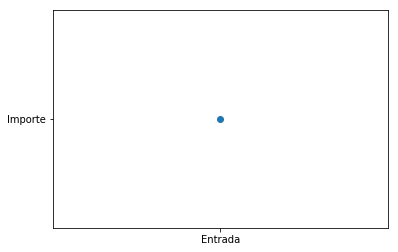

In [29]:
plt.plot_date('Entrada', 'Importe')

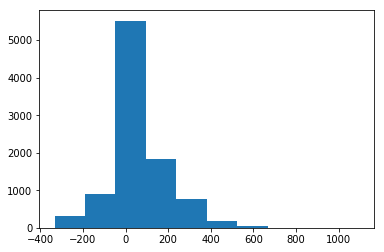

In [18]:
plt.hist(Data['Antelacion'])
plt.show()

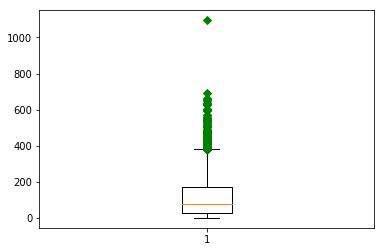

In [23]:
A = Data['Antelacion']
plt.boxplot(A,0,'gD')
plt.show()

In [36]:
Data.groupby('Month_FR')['Antelacion'].count()

Month_FR
1     1080
2      872
3      805
4      825
5      786
6      711
7      830
8      685
9      651
10     729
11     772
12     789
Name: Antelacion, dtype: int64

TypeError: count() takes exactly one argument (0 given)

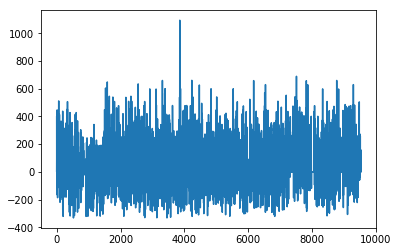

In [41]:
plt.plot(Data['Antelacion'])
plt.show()

In [81]:
Data.groupby('Day_FR')['Importe'].median()

Day_FR
1     1525.0
2     1350.0
3     1489.0
4     1334.0
5     1084.0
6     1215.0
7     1248.0
8      889.0
9     1129.0
10    1186.0
11    1339.0
12    1356.0
13    1250.5
14    1086.0
15    1317.0
16    1356.0
17    1235.0
18    1338.0
19    1310.0
20    1350.0
21    1073.0
22    1200.5
23    1182.0
24    1051.0
25    1186.0
26    1243.0
27    1183.5
28    1186.0
29    1327.0
30    1529.0
31    1400.0
Name: Importe, dtype: float64

In [91]:
Data.groupby('Month_FR')['Antelacion'].median()

Month_FR
1     60.0
2     40.5
3     37.0
4     45.0
5     37.0
6     29.0
7     10.0
8     10.0
9     25.0
10    28.0
11    11.0
12     4.0
Name: Antelacion, dtype: float64

In [92]:
Data.groupby('Day_FR')['Antelacion'].median()

Day_FR
1     -13.0
2      -4.0
3       0.0
4       0.0
5      39.0
6      31.0
7      31.0
8      31.0
9     109.0
10    134.0
11    159.0
12    215.0
13     38.0
14     27.0
15     34.0
16     27.0
17     27.0
18     34.0
19     30.5
20     27.0
21     14.0
22     22.0
23     10.0
24     23.0
25     28.0
26     29.0
27     30.5
28     35.0
29     27.5
30     48.0
31     42.0
Name: Antelacion, dtype: float64

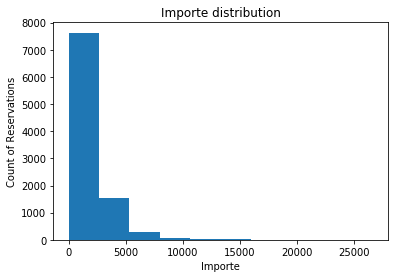

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(Data['Importe'], bins = 10, range = (Data['Importe'].min(),Data['Importe'].max()))
plt.title('Importe distribution')
plt.xlabel('Importe')
plt.ylabel('Count of Reservations')
plt.show()

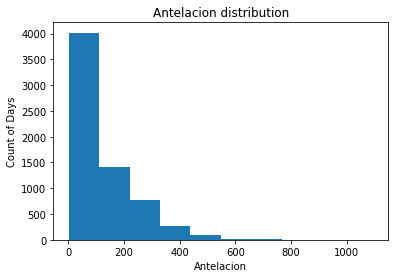

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(Data['Antelacion'], bins = 10, range = (Data['Antelacion'].min(),Data['Antelacion'].max()))
plt.title('Antelacion distribution')
plt.xlabel('Antelacion')
plt.ylabel('Count of Days')
plt.show()

In [42]:
Data.describe()

,ID,Cant_Hab,Pax,TotalNoches,Anulación,Importe,Antelacion
count,6578.000000,6578.000000,6578.000000,6578.000000,0.0,6578.000000,6578.000000
mean,4649.904074,1.054272,4.023563,3.918060,NaN,1940.274095,114.243083
std,2694.487198,0.426367,2.437959,2.585054,NaN,2020.280069,114.957490
min,1.000000,1.000000,1.000000,0.000000,NaN,0.000000,1.000000
25%,2371.250000,1.000000,2.000000,2.000000,NaN,678.000000,29.000000
50%,4598.500000,1.000000,4.000000,3.000000,NaN,1483.500000,76.000000
75%,6887.500000,1.000000,5.000000,5.000000,NaN,2610.000000,170.000000
max,9537.000000,15.000000,62.000000,45.000000,NaN,26644.000000,1095.000000


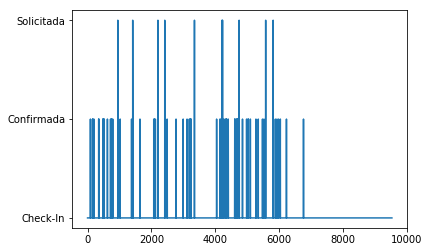

In [45]:
plt.plot(Data['Estado'])
plt.show()

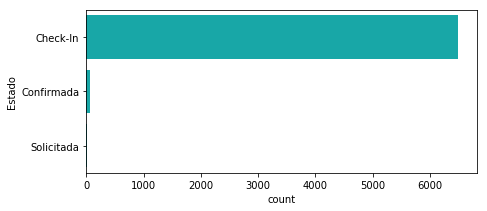

In [46]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Estado", data=Data, color="c");

In [66]:
Data.describe()

,ID,Cant_Hab,Pax,TotalNoches,Anulación,Importe,Antelacion
count,9535.000000,9535.000000,9535.000000,9535.000000,0.0,9535.000000,9535.000000
mean,4769.376193,1.053697,3.885160,3.781227,NaN,1704.101206,59.401049
std,2753.295661,0.469827,2.443514,2.577957,NaN,1860.135954,133.831654
min,1.000000,1.000000,1.000000,0.000000,NaN,0.000000,-333.000000
25%,2385.500000,1.000000,2.000000,2.000000,NaN,524.000000,0.000000
50%,4770.000000,1.000000,4.000000,3.000000,NaN,1265.000000,31.000000
75%,7153.500000,1.000000,5.000000,5.000000,NaN,2305.000000,122.000000
max,9537.000000,24.000000,62.000000,45.000000,NaN,26644.000000,1095.000000


<function matplotlib.pyplot.show(*args, **kw)>

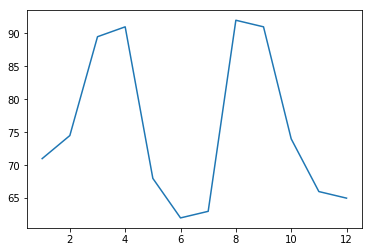

In [21]:
plt.plot(Data.groupby('Month_FR')['Antelacion'].median())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

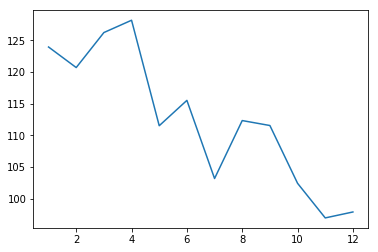

In [26]:
plt.plot(Data.groupby('Month_FR')['Antelacion'].mean())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

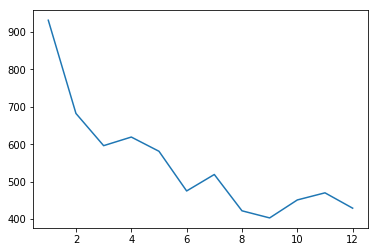

In [22]:
plt.plot(Data.groupby('Month_FR')['Antelacion'].count())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

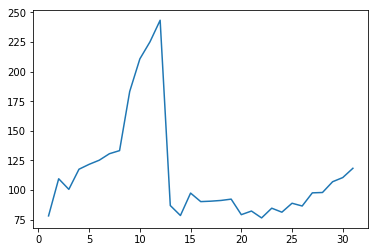

In [24]:
plt.plot(Data.groupby('Day_FR')['Antelacion'].mean())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

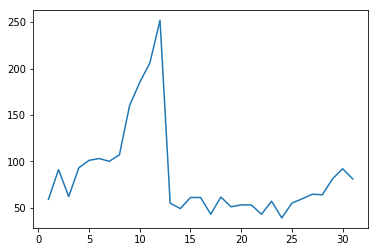

In [25]:
plt.plot(Data.groupby('Day_FR')['Antelacion'].median())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

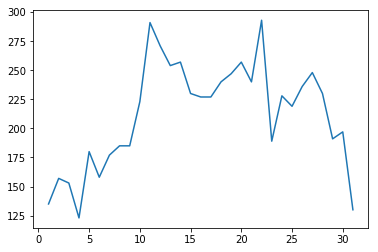

In [23]:
plt.plot(Data.groupby('Day_FR')['Antelacion'].count())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

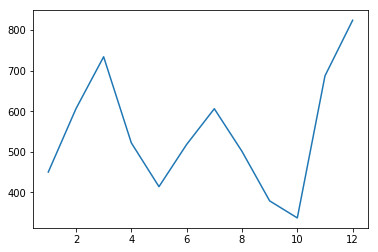

In [27]:
plt.plot(Data.groupby('Month_Ent')['Antelacion'].count())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

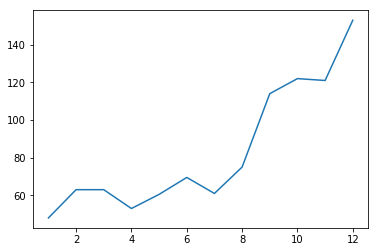

In [36]:
plt.plot(Data.groupby('Month_Ent')['Antelacion'].median())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

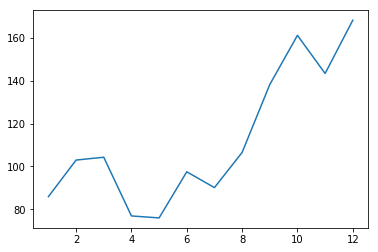

In [29]:
plt.plot(Data.groupby('Month_Ent')['Antelacion'].mean())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

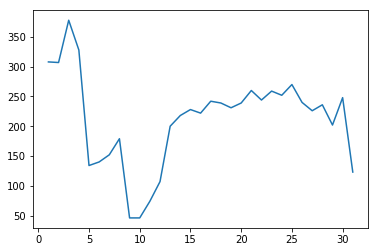

In [30]:
plt.plot(Data.groupby('Day_Ent')['Antelacion'].count())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

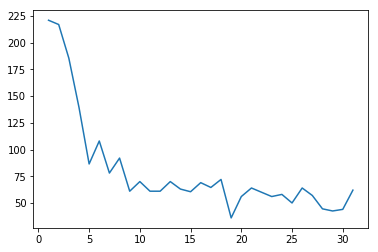

In [31]:
plt.plot(Data.groupby('Day_Ent')['Antelacion'].median())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

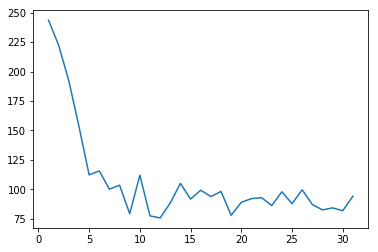

In [32]:
plt.plot(Data.groupby('Day_Ent')['Antelacion'].mean())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

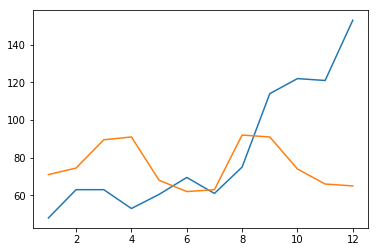

In [37]:
plt.plot(Data.groupby('Month_Ent')['Antelacion'].median())
plt.plot(Data.groupby('Month_FR')['Antelacion'].median())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

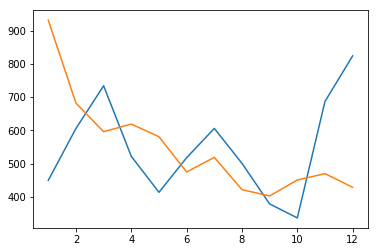

In [38]:
plt.plot(Data.groupby('Month_Ent')['Antelacion'].count())
plt.plot(Data.groupby('Month_FR')['Antelacion'].count())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

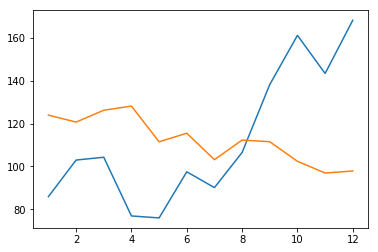

In [39]:
plt.plot(Data.groupby('Month_Ent')['Antelacion'].mean())
plt.plot(Data.groupby('Month_FR')['Antelacion'].mean())
plt.show

In [56]:
Data.groupby('Month_Ent')['Importe'].median()

Month_Ent
1     1542.0
2     1741.0
3     1988.0
4     1468.0
5     1084.5
6     1335.5
7     1356.0
8     1170.0
9     1017.0
10    1032.0
11    1129.0
12    2794.5
Name: Importe, dtype: float64

In [57]:
Data.groupby('Month_Ent')['Pax'].median()

Month_Ent
1     4
2     4
3     4
4     4
5     3
6     4
7     4
8     4
9     4
10    4
11    4
12    4
Name: Pax, dtype: int64

In [55]:
Data.groupby('Month_Ent')['Importe'].mean()

Month_Ent
1     1955.017778
2     2134.476898
3     2281.253406
4     1827.869732
5     1441.236715
6     1603.401544
7     1589.620462
8     1446.672655
9     1394.722955
10    1547.973294
11    1439.328967
12    3406.396845
Name: Importe, dtype: float64

In [58]:
Data.groupby('Month_Ent')['Pax'].mean()

Month_Ent
1     3.844444
2     4.001650
3     4.204360
4     3.814176
5     3.623188
6     4.030888
7     4.044554
8     4.013972
9     3.746702
10    3.949555
11    3.852984
12    4.595874
Name: Pax, dtype: float64

In [31]:
Data = Data[Data.Antelacion <400]

<function matplotlib.pyplot.show(*args, **kw)>

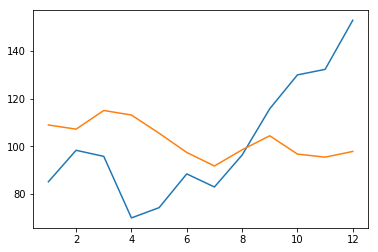

In [32]:
plt.plot(Data.groupby('Month_Ent')['Antelacion'].mean())
plt.plot(Data.groupby('Month_FR')['Antelacion'].mean())
plt.show

In [33]:
Data.describe()

,ID,Cant_Hab,Pax,TotalNoches,Anulación,Importe,Antelacion,Year_FR,Month_FR,Day_FR,Year_Ent,Month_Ent,Day_Ent
count,6394.000000,6394.000000,6394.000000,6394.000000,0.0,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,4639.515327,1.049734,4.002502,3.875352,NaN,1917.829684,103.754926,2015.086957,5.779012,16.788865,2015.305130,6.583672,16.429778
std,2692.244538,0.383082,2.360381,2.482841,NaN,2010.080993,97.280744,2.482589,3.552180,8.299502,2.530517,3.609340,9.213129
min,1.000000,1.000000,1.000000,0.000000,NaN,0.000000,1.000000,2009.000000,1.000000,1.000000,2009.000000,1.000000,1.000000
25%,2363.250000,1.000000,2.000000,2.000000,NaN,672.000000,28.000000,2013.000000,3.000000,10.000000,2013.000000,3.000000,7.000000
50%,4595.000000,1.000000,4.000000,3.000000,NaN,1449.000000,71.000000,2015.000000,5.000000,17.000000,2016.000000,7.000000,18.000000
75%,6860.750000,1.000000,5.000000,5.000000,NaN,2589.000000,160.000000,2017.000000,9.000000,24.000000,2018.000000,10.000000,24.000000
max,9537.000000,15.000000,62.000000,45.000000,NaN,26644.000000,399.000000,2019.000000,12.000000,31.000000,2019.000000,12.000000,31.000000


In [34]:
Data = Data[Data.Antelacion <200]

<function matplotlib.pyplot.show(*args, **kw)>

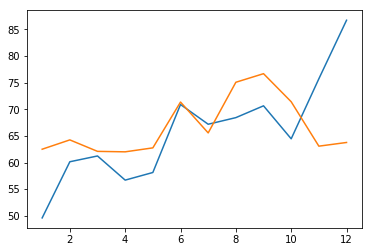

In [35]:
plt.plot(Data.groupby('Month_Ent')['Antelacion'].mean())
plt.plot(Data.groupby('Month_FR')['Antelacion'].mean())
plt.show

In [36]:
Data.describe()

,ID,Cant_Hab,Pax,TotalNoches,Anulación,Importe,Antelacion,Year_FR,Month_FR,Day_FR,Year_Ent,Month_Ent,Day_Ent
count,5240.000000,5240.000000,5240.000000,5240.000000,0.0,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000
mean,4558.669466,1.041221,3.897710,3.720038,NaN,1737.804198,66.106679,2015.030725,5.930153,17.130725,2015.183206,6.273092,17.205153
std,2675.721869,0.301139,2.127685,2.346339,NaN,1819.295668,55.851252,2.527122,3.560682,8.334410,2.562154,3.473022,8.760699
min,3.000000,1.000000,1.000000,0.000000,NaN,0.000000,1.000000,2009.000000,1.000000,1.000000,2009.000000,1.000000,1.000000
25%,2274.750000,1.000000,2.000000,2.000000,NaN,575.000000,19.000000,2013.000000,3.000000,11.000000,2013.000000,3.000000,10.000000
50%,4461.500000,1.000000,4.000000,3.000000,NaN,1308.500000,55.000000,2015.000000,6.000000,18.000000,2015.000000,6.000000,18.000000
75%,6770.250000,1.000000,5.000000,5.000000,NaN,2367.000000,105.000000,2017.000000,9.000000,24.000000,2017.000000,9.000000,24.000000
max,9537.000000,8.000000,32.000000,32.000000,NaN,23108.000000,199.000000,2019.000000,12.000000,31.000000,2019.000000,12.000000,31.000000


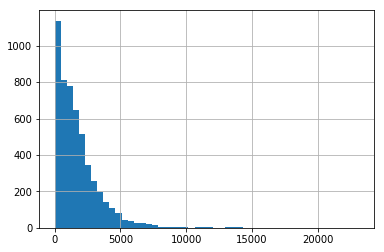

In [37]:
Data['Importe'].hist(bins=50)

In [38]:
Data.groupby('Month_Ent')['Importe'].mean()

Month_Ent
1     1816.563969
2     1974.738866
3     2141.910891
4     1680.883333
5     1324.102094
6     1525.530172
7     1524.065574
8     1299.854722
9     1085.388889
10    1084.309524
11    1299.215933
12    3129.523438
Name: Importe, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

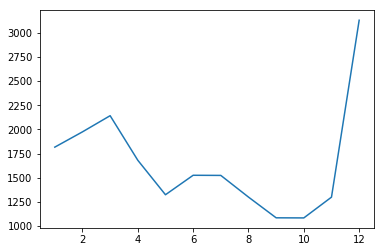

In [40]:
plt.plot(Data.groupby('Month_Ent')['Importe'].mean())
plt.show

In [42]:
Data.groupby('Month_Ent')['Pax'].mean()

Month_Ent
1     3.691906
2     3.858300
3     4.075908
4     3.685417
5     3.418848
6     3.924569
7     3.985428
8     3.985472
9     3.681481
10    3.661905
11    3.849057
12    4.501953
Name: Pax, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

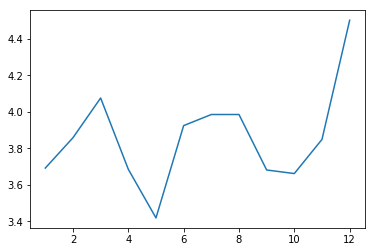

In [41]:
plt.plot(Data.groupby('Month_Ent')['Pax'].mean())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

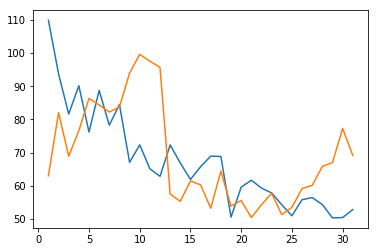

In [43]:
plt.plot(Data.groupby('Day_Ent')['Antelacion'].mean())
plt.plot(Data.groupby('Day_FR')['Antelacion'].mean())
plt.show

Text(0, 0.5, 'TotalNoches')

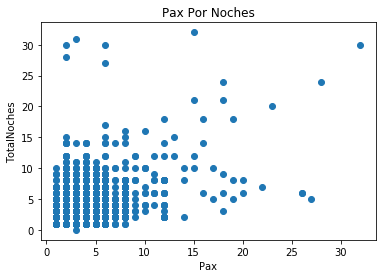

In [44]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(Data['Pax'], Data['TotalNoches'])
# set a title and labels
ax.set_title('Pax Por Noches')
ax.set_xlabel('Pax')
ax.set_ylabel('TotalNoches')

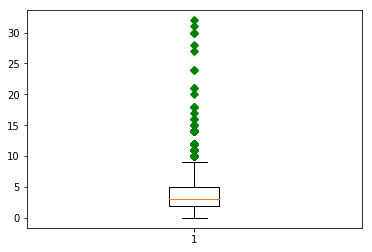

In [45]:
A = Data['TotalNoches']
plt.boxplot(A,0,'gD')
plt.show()

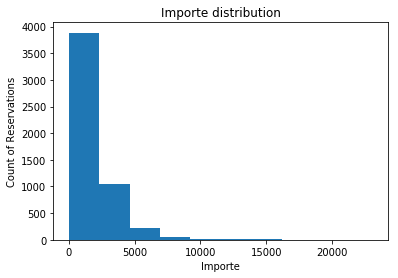

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(Data['Importe'], bins = 10, range = (Data['Importe'].min(),Data['Importe'].max()))
plt.title('Importe distribution')
plt.xlabel('Importe')
plt.ylabel('Count of Reservations')
plt.show()

In [3]:
Data6 = pd.read_csv("historico_rese_room_original2.csv", index_col ='Tarifa', header =1)

In [4]:
Data6['Entrada'] =  pd.to_datetime(Data6['Entrada'])
Data6['F_Reserva'] =  pd.to_datetime(Data6['F_Reserva'])
Data6['Salida'] =  pd.to_datetime(Data6['Salida'])
Data6['Antelacion'] = (Data6['Entrada'] - Data6['F_Reserva'])
Data6.Importe = Data6.Importe.str.replace(',','')
Data6['Importe'] = pd.to_numeric(Data6['Importe'],errors='coerce')
Data6 = Data6[Data6.TotalNoches <51]
Data6['Antelacion'] = Data6['Antelacion'] / (np.timedelta64(1,'D'))
Data6['Antelacion'] = Data6['Antelacion'].astype(np.int64)
Data6 = Data6[Data6.Antelacion >0]

In [5]:
Data6['Year_FR'] = (pd.to_datetime(Data6.F_Reserva).dt.year)
Data6['Month_FR'] = (pd.to_datetime(Data6.F_Reserva).dt.month)
Data6['Day_FR'] = (pd.to_datetime(Data6.F_Reserva).dt.day)
Data6['Year_Ent'] = (pd.to_datetime(Data6.Entrada).dt.year)
Data6['Month_Ent'] = (pd.to_datetime(Data6.Entrada).dt.month)
Data6['Day_Ent'] = (pd.to_datetime(Data6.Entrada).dt.day)

In [69]:
Data_Airbnb = Data6.loc["AIRBNB     "]

<function matplotlib.pyplot.show(*args, **kw)>

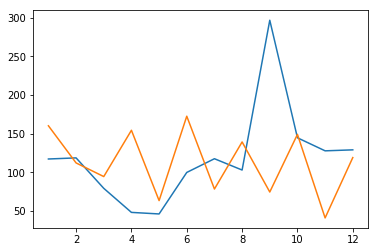

In [70]:
plt.plot(Data_Airbnb.groupby('Month_Ent')['Antelacion'].mean())
plt.plot(Data_Airbnb.groupby('Month_FR')['Antelacion'].mean())
plt.show

In [59]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6578 entries, 0 to 9536
Data columns (total 22 columns):
ID             6578 non-null float64
Número         6578 non-null object
Nombre         6578 non-null object
Tarifa         6578 non-null object
Entrada        6578 non-null datetime64[ns]
Salida         6578 non-null datetime64[ns]
Noches         6578 non-null object
Cant_Hab       6578 non-null int64
Pax            6578 non-null int64
TotalNoches    6578 non-null int64
F_Reserva      6578 non-null datetime64[ns]
Anulación      0 non-null float64
Estado         6578 non-null object
Importe        6578 non-null float64
Moneda         6578 non-null object
Antelacion     6578 non-null int64
Year_FR        6578 non-null int64
Month_FR       6578 non-null int64
Day_FR         6578 non-null int64
Year_Ent       6578 non-null int64
Month_Ent      6578 non-null int64
Day_Ent        6578 non-null int64
dtypes: datetime64[ns](3), float64(3), int64(10), object(6)
memory usage: 1.3+ MB


In [54]:
Data5

,ID,Número,Nombre,Entrada,Salida,Noches,Cant_Hab,Pax,TotalNoches,F_Reserva,Anulación,Estado,Importe,Moneda
Tarifa,,,,,,,,,,,,,,
2 COSTA RIC,1.0,RE 64,MARLIS JANSEN,13/2/2010,20/2/2010,7,1,4,7,1/12/2009,NaN,Check-In,"5,734.00",USD
2 COSTA RIC,2.0,RE 482,bmbnm,12/8/2010,13/8/2010,1,1,2,1,12/8/2010,NaN,Solicitada,397,USD
2 COSTA RIC,3.0,RE 693,Pete Wilson,27/12/2010,29/12/2010,2,1,4,2,15/12/2010,NaN,Check-In,"1,299.00",USD
2 COSTA RIC,4.0,RE 884,Ted W Sartin,26/2/2011,28/2/2011,2,1,2,2,17/2/2011,NaN,Check-In,621,USD
2 COSTA RIC,5.0,RE 1067,Allen & Scarlotte Kilgore,11/5/2011,14/5/2011,3,1,2,3,30/4/2011,NaN,Check-In,847,USD
ADOBECAR,6.0,RE 883,Dakajos Family,30/3/2011,3/4/2011,4,1,4,4,17/2/2011,NaN,Check-In,"2,260.00",USD
ADOBECAR,7.0,RE 923,Head Family,20/3/2011,23/3/2011,3,1,6,3,25/2/2011,NaN,Check-In,"1,762.00",USD
ADOBECAR 20,8.0,RE 2143,HANDLER FAMILY,3/7/2012,6/7/2012,3,1,4,3,7/6/2012,NaN,Check-In,"1,356.00",USD
ADOBECAR 20,9.0,RE 2362,KEVIN & DOLORES KURTZ,6/1/2013,9/1/2013,3,1,2,3,24/8/2012,NaN,Check-In,0,USD


In [23]:
Data_BOOKING = Data6.loc["BOOKING    "]

<function matplotlib.pyplot.show(*args, **kw)>

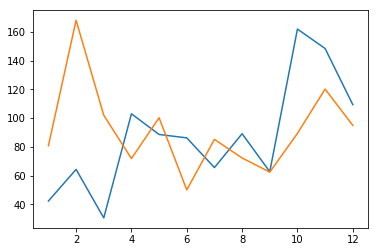

In [24]:
plt.plot(Data_BOOKING.groupby('Month_Ent')['Antelacion'].mean())
plt.plot(Data_BOOKING.groupby('Month_FR')['Antelacion'].mean())
plt.show

In [ ]:
Data_BOOKING = Data6.loc["BOOKING    "]

In [20]:
Data.Tarifa.unique()

array(['2 COSTA RIC', 'ADOBECAR   ', 'ADOBECAR 20', 'AGENTES    ',
       'AGENTES P. ', 'AIRBNB     ', 'AIRBNB PDM ', 'Albee adv  ',
       'ALBEE ADV. ', 'AMIGOS OREN', 'Anywhere CR', 'BILL BEARDS',
       'BODA DIRECT', 'BODAS      ', 'BOOKING    ', 'BOOKING PDM',
       'BOOKING.COM', 'BOOKIT     ', 'BRAVO TRAVE', 'Buena Vista',
       'C.A JOURNEY', 'CACTUS TOUR', 'CAF        ', 'CAMINO TRAV',
       'CANATUR    ', 'CANJE      ', 'Carlton    ', 'CLASSIC VAC',
       'COAST 2 COA', 'COMISIONIST', 'Completely ', 'COUPLES PAC',
       'CPL        ', 'CPL AGENCIA', 'CPL AIRBNB ', 'CPL DES    ',
       'CPL donacio', 'CPL ESC FUT', 'CPL FRACTIO', 'CPL SIN DES',
       'CPL TITI   ', 'CPL TRABAJO', 'CR DESIGNER', 'CR Dream Ma',
       'CR EXP     ', 'CR EXPEDIT ', 'CR on Line ', 'CR ONL TRV ',
       'CR ONLINE T', 'CR OUTDOORS', 'CR Paradise', 'CR REFERRAL',
       'CR RIOS    ', 'CR SUN     ', 'CR SUN TOUR', 'CR TOUR & T',
       'CR TRVL MRK', 'CR UNIQUE  ', 'CR VAC     ', 'CR Vacati

In [37]:
Data_EXPEDIA = Data6.loc[['EXPEDIA 25 ', 'EXPEDIA HC ', 'EXPEDIA PAQ']]

<function matplotlib.pyplot.show(*args, **kw)>

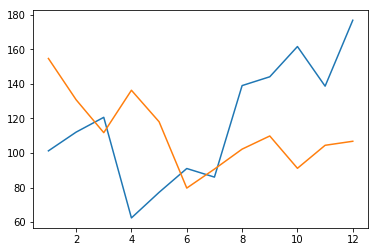

In [38]:
plt.plot(Data_EXPEDIA.groupby('Month_Ent')['Antelacion'].mean())
plt.plot(Data_EXPEDIA.groupby('Month_FR')['Antelacion'].mean())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

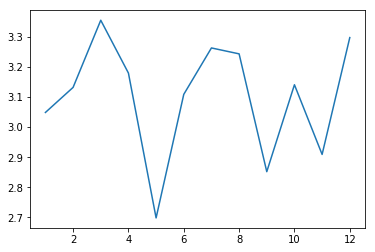

In [42]:
plt.plot(Data_EXPEDIA.groupby('Month_Ent')['Pax'].mean())
plt.show

In [39]:
Data_WEBSITE = Data6.loc[['WEBSITE    ', 'WEB MS NR  ','WEB NR     ','WEBSITE MS ']]

<function matplotlib.pyplot.show(*args, **kw)>

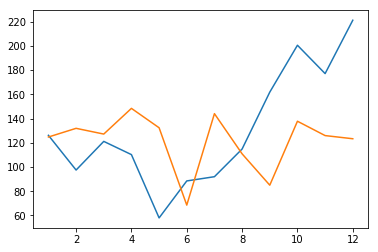

In [40]:
plt.plot(Data_WEBSITE.groupby('Month_Ent')['Antelacion'].mean())
plt.plot(Data_WEBSITE.groupby('Month_FR')['Antelacion'].mean())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

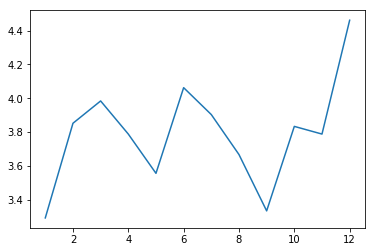

In [41]:
plt.plot(Data_WEBSITE.groupby('Month_Ent')['Pax'].mean())
plt.show

In [45]:
Data_INTERNET = Data6.loc[['WEBSITE    ', 'WEB MS NR  ','WEB NR     ','WEBSITE MS ', 'EXPEDIA 25 ', 'EXPEDIA HC ', 'EXPEDIA PAQ', 'BOOKING    ']]

<function matplotlib.pyplot.show(*args, **kw)>

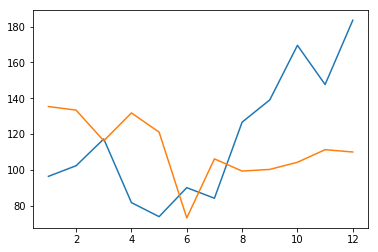

In [46]:
plt.plot(Data_INTERNET.groupby('Month_Ent')['Antelacion'].mean())
plt.plot(Data_INTERNET.groupby('Month_FR')['Antelacion'].mean())
plt.show

In [9]:
Data_ALL = Data6.loc[['WEBSITE    ', 'WEB MS NR  ','WEB NR     ','WEBSITE MS ', 'EXPEDIA 25 ', 'EXPEDIA HC ', 'EXPEDIA PAQ',
                      'BOOKING    ', 'E-MAIL     ', 'BOOKING.COM', 'AIRBNB     ', 'TELEFONO   ']]

c:\users\esteban vargas\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


<function matplotlib.pyplot.show(*args, **kw)>

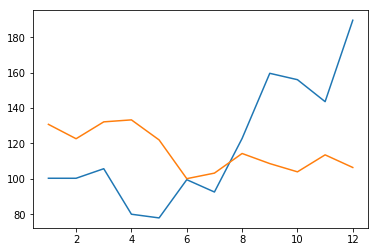

In [10]:
plt.plot(Data_ALL.groupby('Month_Ent')['Antelacion'].mean())
plt.plot(Data_ALL.groupby('Month_FR')['Antelacion'].mean())
plt.show

In [11]:
Data_ALL = Data_ALL[Data_ALL.Antelacion <200]

<function matplotlib.pyplot.show(*args, **kw)>

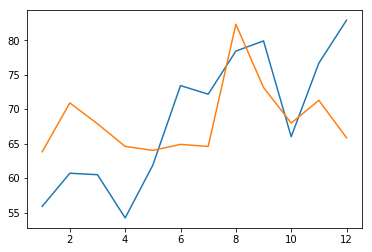

In [12]:
plt.plot(Data_ALL.groupby('Month_Ent')['Antelacion'].mean())
plt.plot(Data_ALL.groupby('Month_FR')['Antelacion'].mean())
plt.show

In [6]:
Data_IMPORTE = Data6.loc[['WEBSITE    ', 'WEB MS NR  ','WEB NR     ','WEBSITE MS ', 'E-MAIL     ', 'TELEFONO   ']]

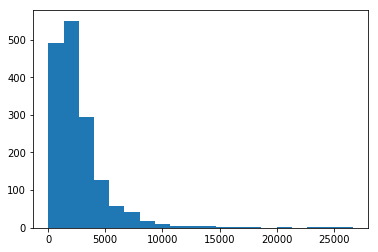

In [12]:
plt.hist(Data_IMPORTE['Importe'], bins=20)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

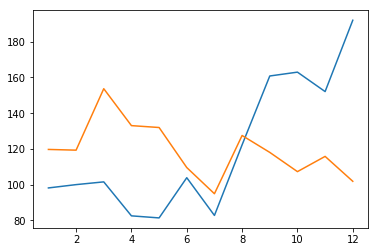

In [14]:
plt.plot(Data_IMPORTE.groupby('Month_Ent')['Antelacion'].mean())
plt.plot(Data_IMPORTE.groupby('Month_FR')['Antelacion'].mean())
plt.show

In [15]:
Data_IMPORTE = Data_IMPORTE[Data_IMPORTE.Antelacion <200]

<function matplotlib.pyplot.show(*args, **kw)>

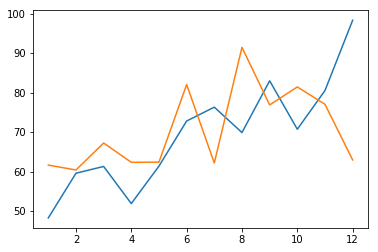

In [16]:
plt.plot(Data_IMPORTE.groupby('Month_Ent')['Antelacion'].mean())
plt.plot(Data_IMPORTE.groupby('Month_FR')['Antelacion'].mean())
plt.show

In [18]:
Data_IMPORTE.describe()

,ID,Cant_Hab,Pax,TotalNoches,Anulación,Importe,Antelacion,Year_FR,Month_FR,Day_FR,Year_Ent,Month_Ent,Day_Ent
count,1238.000000,1238.000000,1238.000000,1238.00000,0.0,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,4901.046042,1.046850,4.314216,3.95315,NaN,2412.764136,68.661551,2015.436995,5.678514,17.169628,2015.601777,5.959612,17.187399
std,1466.104022,0.307916,2.506059,2.45201,NaN,2165.564726,56.162854,2.224757,3.622891,8.312139,2.240705,3.460363,8.781941
min,2216.000000,1.000000,1.000000,1.00000,NaN,94.000000,1.000000,2011.000000,1.000000,1.000000,2011.000000,1.000000,1.000000
25%,3284.250000,1.000000,3.000000,2.00000,NaN,1120.250000,22.000000,2013.000000,2.000000,11.000000,2014.000000,3.000000,10.000000
50%,5405.000000,1.000000,4.000000,4.00000,NaN,1808.000000,58.000000,2015.000000,5.000000,18.000000,2016.000000,6.000000,18.000000
75%,5909.500000,1.000000,5.000000,5.00000,NaN,3051.000000,108.000000,2018.000000,9.000000,24.000000,2018.000000,8.750000,25.000000
max,6600.000000,6.000000,32.000000,30.00000,NaN,23108.000000,199.000000,2019.000000,12.000000,31.000000,2019.000000,12.000000,31.000000


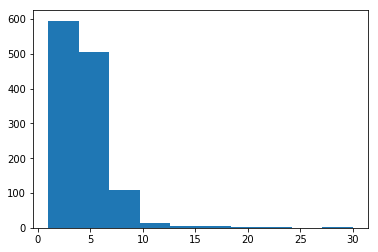

In [19]:
plt.hist(Data_IMPORTE['TotalNoches'])
plt.show()

In [35]:
Data7 = pd.read_csv("historico_rese_room_original3.csv", index_col='Tarifa', header =1)

In [36]:
Data7['Entrada'] =  pd.to_datetime(Data7['Entrada'])
Data7['F_Reserva'] =  pd.to_datetime(Data7['F_Reserva'])
Data7['Salida'] =  pd.to_datetime(Data7['Salida'])
Data7['Antelacion'] = (Data7['Entrada'] - Data7['F_Reserva'])
Data7.Importe = Data7.Importe.str.replace(',','')
Data7['Importe'] = pd.to_numeric(Data7['Importe'],errors='coerce')
Data7 = Data7[Data7.TotalNoches <51]
Data7['Antelacion'] = Data7['Antelacion'] / (np.timedelta64(1,'D'))
Data7['Antelacion'] = Data7['Antelacion'].astype(np.int64)
Data7 = Data7[Data7.Antelacion >0]

In [37]:
Data7['Year_FR'] = (pd.to_datetime(Data7.F_Reserva).dt.year)
Data7['Month_FR'] = (pd.to_datetime(Data7.F_Reserva).dt.month)
Data7['Day_FR'] = (pd.to_datetime(Data7.F_Reserva).dt.day)
Data7['Year_Ent'] = (pd.to_datetime(Data7.Entrada).dt.year)
Data7['Month_Ent'] = (pd.to_datetime(Data7.Entrada).dt.month)
Data7['Day_Ent'] = (pd.to_datetime(Data7.Entrada).dt.day)

In [39]:
Data_GRAPH = Data7.loc[['WEBSITE    ', 'WEB MS NR  ','WEB NR     ','WEBSITE MS ', 'E-MAIL     ', 'TELEFONO   ']]

In [41]:
Data_GRAPH

,ID,Número,Nombre,Entrada,Salida,Noches,Cant_Hab,Pax,TotalNoches,F_Reserva,...,Importe,Moneda,Tarifa2,Antelacion,Year_FR,Month_FR,Day_FR,Year_Ent,Month_Ent,Day_Ent
Tarifa,,,,,,,,,,,,,,,,,,,,,
WEBSITE,6093.0,RE 1319,Richard Visser,2012-02-16,2012-02-20,4,1,4,4,2011-08-16,...,2711.0,USD,WEBSITE,184,2011,8,16,2012,2,16
WEBSITE,6094.0,RE 1411,Kelly Hanlon,2011-11-25,2011-11-29,4,1,2,4,2011-07-10,...,1130.0,USD,WEBSITE,138,2011,7,10,2011,11,25
WEBSITE,6095.0,RE 1542,TRACY CHIU,2012-01-14,2012-01-15,1,1,3,1,2011-11-18,...,395.0,USD,WEBSITE,57,2011,11,18,2012,1,14
WEBSITE,6096.0,RE 1547,JON TKAC,2012-02-23,2012-02-25,2,1,4,2,2011-11-19,...,1118.0,USD,WEBSITE,96,2011,11,19,2012,2,23
WEBSITE,6097.0,RE 1549,LILIA PALMA,2012-06-01,2012-09-01,3,1,2,3,2011-11-22,...,839.0,USD,WEBSITE,192,2011,11,22,2012,6,1
WEBSITE,6099.0,RE 1556,KRISTEN WILLIAMS,2012-02-04,2012-07-04,5,1,2,5,2011-11-23,...,1553.0,USD,WEBSITE,73,2011,11,23,2012,2,4
WEBSITE,6101.0,RE 1572,SHARON SIMMONS,2012-09-04,2012-04-16,7,1,4,7,2011-11-30,...,2966.0,USD,WEBSITE,279,2011,11,30,2012,9,4
WEBSITE,6102.0,RE 1577,YINE DE LA CRUZ,2012-02-16,2012-02-19,3,1,4,3,2011-03-12,...,1296.0,USD,WEBSITE,341,2011,3,12,2012,2,16
WEBSITE,6103.0,RE 1590,RAZ BARR,2012-01-28,2012-01-29,1,1,2,1,2011-08-12,...,508.0,USD,WEBSITE,169,2011,8,12,2012,1,28


In [44]:
Data_GRAPH.groupby(['Tarifa2', 'Month_Ent'])['Tarifa2'].count()

Tarifa2      Month_Ent
E-MAIL       1             39
             2             47
             3             58
             4             27
             5             24
             6             23
             7             29
             8             26
             9             27
             10            12
             11            48
             12            69
TELEFONO     1             59
             2             67
             3             89
             4             52
             5             55
             6             65
             7             74
             8             56
             9             44
             10            36
             11            82
             12           102
WEB MS NR    10             1
             11             1
WEB NR       1              1
             2              2
             3              3
             4              3
             5              2
             11             2
             12  